# Gender Recognition by Voice Using Numerical Algorithms

## Importing Data

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)

data = pd.read_csv("data/cleaned/voice_data.csv")
X_train = pd.read_csv("data/cleaned/X_train.csv")
y_train = pd.read_csv("data/cleaned/y_train.csv")
X_test = pd.read_csv("data/cleaned/X_test.csv")
y_test = pd.read_csv("data/cleaned/y_test.csv")

In [4]:
data.head()

,meanfreq,median,Q25,Q75,IQR,sd,log_skew,log_kurt,sp.ent,sfm,mode,meanfun,log_minfun,exp_maxfun,modindx,meandom,mindom,maxdom,dfrange,label
0,-4.049248,-4.224901,-2.576102,-5.693607,-0.214778,0.427355,2.925892,3.177486,-0.039083,0.471575,-2.141210,-1.812038,-1.384486,0.636793,-1.454772,-1.564205,-0.708404,-1.431422,-1.419137,male
1,-3.841053,-3.999293,-2.486885,-5.588987,-0.258485,0.611669,4.032721,4.022523,-0.065236,0.594431,-2.141210,-1.079594,-1.369352,-0.524133,-1.014103,-1.561916,-0.708404,-1.418107,-1.405818,male
2,-3.463066,-4.095851,-2.706986,-3.928699,0.909326,1.603848,4.675089,4.506253,-1.083730,0.398261,-2.141210,-1.365368,-1.390131,0.404082,-1.065344,-1.563866,-0.708404,-1.429203,-1.416917,male
3,-0.992157,-0.759454,-0.901418,-0.711205,0.632690,0.899998,-0.927599,-0.837709,1.516383,1.797340,-1.054576,-1.666966,-1.143909,-0.524133,0.614286,-1.195367,-0.708404,-1.273867,-1.261532,male
4,-1.530640,-1.676948,-1.268395,-0.792029,1.005588,1.322561,-1.055855,-0.807635,1.708336,2.114740,-0.790514,-1.127233,-1.239725,0.189238,0.289046,-0.221660,-0.708404,0.124154,0.136933,male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meanfreq    3168 non-null   float64
 1   median      3168 non-null   float64
 2   Q25         3168 non-null   float64
 3   Q75         3168 non-null   float64
 4   IQR         3168 non-null   float64
 5   sd          3168 non-null   float64
 6   log_skew    3168 non-null   float64
 7   log_kurt    3168 non-null   float64
 8   sp.ent      3168 non-null   float64
 9   sfm         3168 non-null   float64
 10  mode        3168 non-null   float64
 11  meanfun     3168 non-null   float64
 12  log_minfun  3168 non-null   float64
 13  exp_maxfun  3168 non-null   float64
 14  modindx     3168 non-null   float64
 15  meandom     3168 non-null   float64
 16  mindom      3168 non-null   float64
 17  maxdom      3168 non-null   float64
 18  dfrange     3168 non-null   float64
 19  label       3168 non-null  

The meaning of the features are as follows:

* `meanfreq`: mean frequency (in kHz)
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `sd`: standard deviation of frequency
* `log_skew`: skewness after logarithmic transformation
* `log_kurt`: kurtosis after logarithmic transformation
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `log_meanfun`: average of fundamental frequency measured across acoustic signal
* `log_minfun`: minimum fundamental frequency measured across acoustic signal after logarithmic transformation
* `exp_maxfun`: maximum fundamental frequency measured across acoustic signal after exponential transformation
* `modindx`: modulation index
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `label`: male or female

## Extracting Important Features

In order to explore more models, we will firstly only use the two most important features `meanfun` and `IQR`, which makes the model simpler and easier to interpret.

In [6]:
X_train_important = X_train[["meanfun", "IQR"]]
X_test_important = X_test[["meanfun", "IQR"]]

## Logistic Regression

In logistic regression, we try to use regression to predict the probability of the label, which is $p(y=\mathtt{male}\mid X=X_i)$.

The general form of logistic regression is as follows:
$$
\begin{align}
\hat{p}(y=k\mid X=x) &= \frac{e^{\beta_{k0}+\beta_{k}^T x}}{1+\sum_{l=1}^{K-1} e^{\beta_{l0}+\beta_{l}^T x}} , &k=1,\cdots,K-1\\
\hat{p}(y=K\mid X=x) &= \frac{1}{1+\sum_{l=1}^{K-1} e^{\beta_{l0}+\beta_{l}^T x}}
\end{align}
$$

Since we only have two classes, we can simplify the model to:
$$
\hat{p}(y=\mathtt{male}\mid X=x) = \frac{e^{\beta_0+\beta^T x}}{1+e^{\beta_0+\beta^T x}}=\frac{1}{1+e^{-(\beta_0+\sum_{i=1}^n \beta_i x_i)}}
$$

For ease of interpretation, we will use only one feature first, which is `meanfun`.

beta_0: -0.18
beta_1: -5.68
Training set accuracy: 0.95
Test set accuracy: 0.95
True Positive Rate: 0.9623
True Negative Rate: 0.9286
False Positive Rate: 0.0714
False Negative Rate: 0.0377
Training set accuracy: 0.9519
Test set accuracy: 0.9458


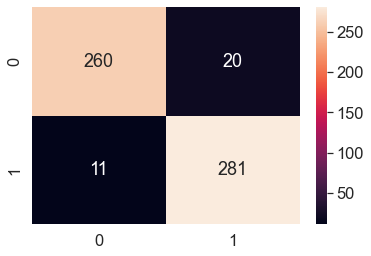

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87).fit(
    X_train_important[["meanfun"]], y_train.squeeze()
)
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
print("beta_1: {:.2f}".format(logreg.coef_[0][0]))
print(
    "Training set accuracy: {:.2f}".format(
        logreg.score(X_train_important[["meanfun"]], y_train.squeeze())
    )
)
print(
    "Test set accuracy: {:.2f}".format(
        logreg.score(X_test_important[["meanfun"]], y_test)
    )
)
sns.heatmap(
    confusion_matrix(y_test, logreg.predict(X_test_important[["meanfun"]])),
    annot=True,
    fmt="d",
)

TN, FP, FN, TP = confusion_matrix(
    y_test, logreg.predict(X_test_important[["meanfun"]])
).ravel()
TPR_logreg_1 = TP / (TP + FN)
TNR_logreg_1 = TN / (TN + FP)
FPR_logreg_1 = FP / (FP + TN)
FNR_logreg_1 = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_logreg_1))
print("True Negative Rate: {:.4f}".format(TNR_logreg_1))
print("False Positive Rate: {:.4f}".format(FPR_logreg_1))
print("False Negative Rate: {:.4f}".format(FNR_logreg_1))

logreg_1_train_accuracy = logreg.score(
    X_train_important[["meanfun"]], y_train.squeeze()
)
logreg_1_test_accuracy = logreg.score(X_test_important[["meanfun"]], y_test.squeeze())

print("Training set accuracy: {:.4f}".format(logreg_1_train_accuracy))
print("Test set accuracy: {:.4f}".format(logreg_1_test_accuracy))

We try to plot the regression line of the model.

<AxesSubplot:xlabel='meanfun', ylabel='label'>

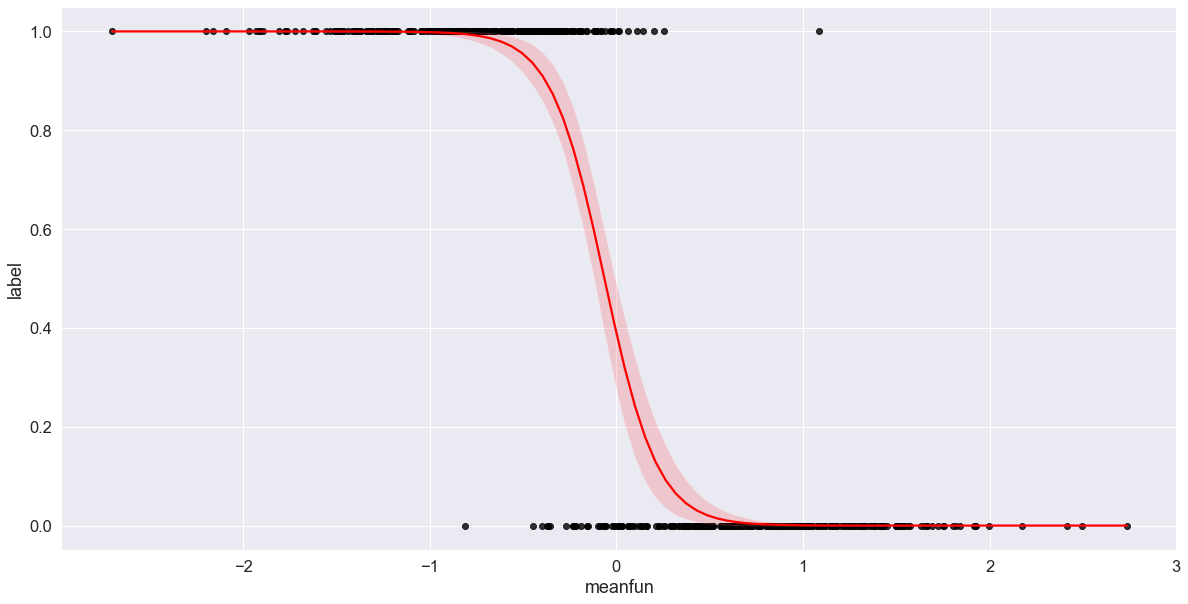

In [8]:
x_plot = X_test_important[["meanfun"]]
y_plot = y_test["label"] == "male"
plt.figure(figsize=(20, 10))
sns.regplot(
    x=x_plot,
    y=y_plot,
    logistic=True,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)

We try to use the two most important features.

beta_0: -0.3139
beta_1: -4.7399
beta_2: 2.1494
Training set accuracy: 0.9676
Test set accuracy: 0.9668
True Positive Rate: 0.9795
True Negative Rate: 0.9536
False Positive Rate: 0.0464
False Negative Rate: 0.0205


<AxesSubplot:>

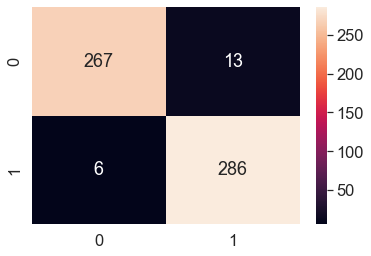

In [9]:
logreg = LogisticRegression(random_state=87).fit(X_train_important, y_train.squeeze())
print("beta_0: {:.4f}".format(logreg.intercept_[0]))
print("beta_1: {:.4f}".format(logreg.coef_[0][0]))
print("beta_2: {:.4f}".format(logreg.coef_[0][1]))
print(
    "Training set accuracy: {:.4f}".format(
        logreg.score(X_train_important, y_train.squeeze())
    )
)
print("Test set accuracy: {:.4f}".format(logreg.score(X_test_important, y_test)))

logreg_2_train_accuracy = logreg.score(X_train_important, y_train.squeeze())
logreg_2_test_accuracy = logreg.score(X_test_important, y_test.squeeze())

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test_important)).ravel()
TPR_logreg_2 = TP / (TP + FN)
TNR_logreg_2 = TN / (TN + FP)
FPR_logreg_2 = FP / (FP + TN)
FNR_logreg_2 = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_logreg_2))
print("True Negative Rate: {:.4f}".format(TNR_logreg_2))
print("False Positive Rate: {:.4f}".format(FPR_logreg_2))
print("False Negative Rate: {:.4f}".format(FNR_logreg_2))

sns.heatmap(
    confusion_matrix(y_test, logreg.predict(X_test_important)), annot=True, fmt="d"
)

We try to plot the probability of the label for the model.

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/var/folders/xj/7wr0m80s2mn861gbh0yh2x_40000gn/T/ipykernel_26402/2654750433.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<AxesSubplot:xlabel='meanfun', ylabel='IQR'>

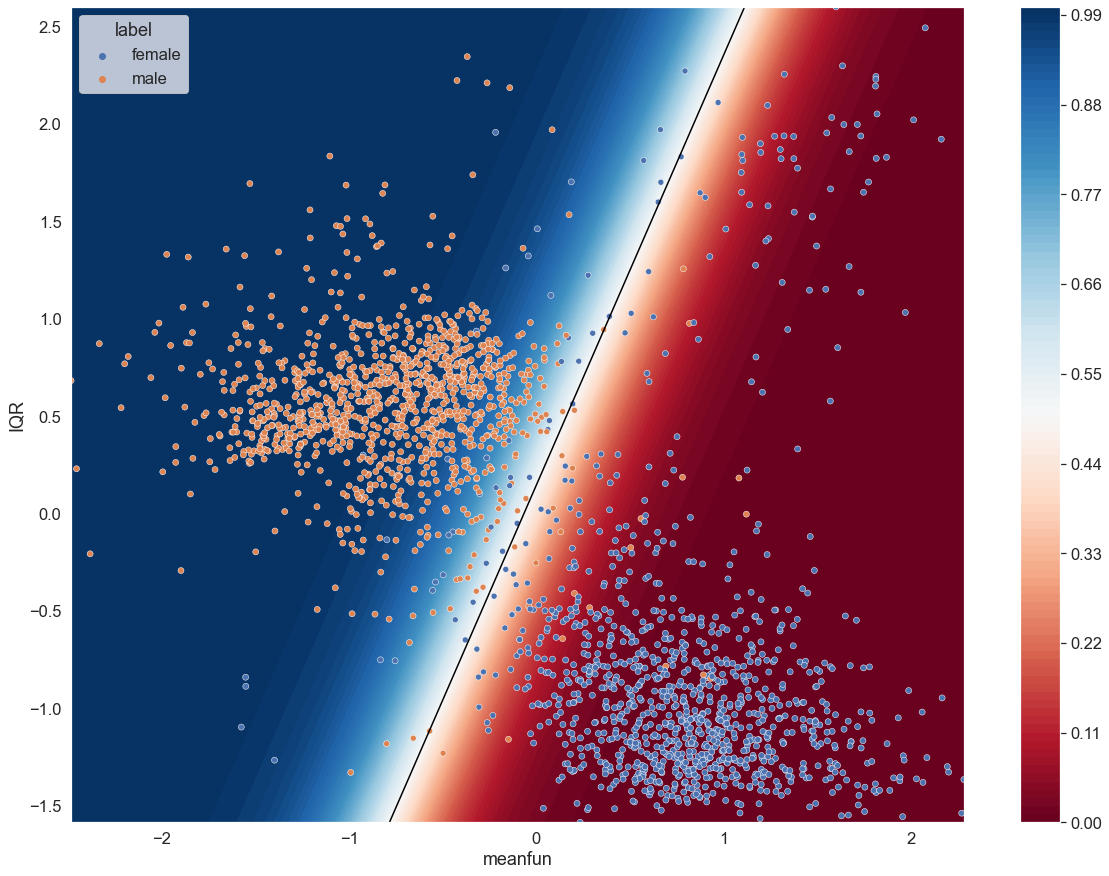

In [10]:
plt.figure(figsize=(20, 15))
x_plot = np.linspace(
    X_train_important["meanfun"].min(), X_train_important["meanfun"].max(), 100
)
y_plot = np.linspace(
    X_train_important["IQR"].min(), X_train_important["IQR"].max(), 100
)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_plot = logreg.predict_proba(
    pd.DataFrame(np.array([X_plot.ravel(), Y_plot.ravel()]).T)
)[:, 1].reshape(X_plot.shape)
plt.contour(X_plot, Y_plot, Z_plot, levels=[0.5], colors="black")
plt.contourf(X_plot, Y_plot, Z_plot, levels=100, cmap="RdBu", vmin=0, vmax=1)
plt.colorbar()
sns.scatterplot(
    X_train_important, x="meanfun", y="IQR", hue=y_train["label"], sizes=(20, 200)
)

Then we try to use all the features.

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87, max_iter=1000).fit(
    X_train, y_train.squeeze()
)
print("beta_0: {:.4f}".format(logreg.intercept_[0]))
for i, beta in enumerate(logreg.coef_[0]):
    print("beta_{}: {:.4f}".format(i + 1, beta))

beta_0: -0.6418
beta_1: 0.1690
beta_2: -0.1417
beta_3: -1.0284
beta_4: 0.7247
beta_5: 1.5705
beta_6: 0.3725
beta_7: 0.7337
beta_8: -0.9051
beta_9: 0.9139
beta_10: -1.5073
beta_11: 0.0187
beta_12: -4.7360
beta_13: 0.5180
beta_14: -0.1442
beta_15: -0.2730
beta_16: -0.0305
beta_17: -0.1243
beta_18: 0.0205
beta_19: 0.0227


Training set accuracy: 0.9781
Test set accuracy: 0.9650
True Positive Rate: 0.9760
True Negative Rate: 0.9536
False Positive Rate: 0.0464
False Negative Rate: 0.0240


<AxesSubplot:>

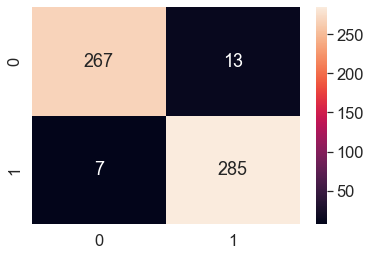

In [12]:
logreg_3_train_accuracy = logreg.score(X_train, y_train)
logreg_3_test_accuracy = logreg.score(X_test, y_test)

print("Training set accuracy: {:.4f}".format(logreg.score(X_train, y_train.squeeze())))
print("Test set accuracy: {:.4f}".format(logreg.score(X_test, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test)).ravel()
TPR_logreg_3 = TP / (TP + FN)
TNR_logreg_3 = TN / (TN + FP)
FPR_logreg_3 = FP / (FP + TN)
FNR_logreg_3 = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_logreg_3))
print("True Negative Rate: {:.4f}".format(TNR_logreg_3))
print("False Positive Rate: {:.4f}".format(FPR_logreg_3))
print("False Negative Rate: {:.4f}".format(FNR_logreg_3))

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test)), annot=True, fmt="d")

We try to summarize the performance of the logistic regression model.

In [13]:
results = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression with 1 feature",
            "Logistic Regression with 2 features",
            "Logistic Regression with all features",
        ],
        "Training Accuracy": [
            logreg_1_train_accuracy,
            logreg_2_train_accuracy,
            logreg_3_train_accuracy,
        ],
        "Test Accuracy": [
            logreg_1_test_accuracy,
            logreg_2_test_accuracy,
            logreg_3_test_accuracy,
        ],
    }
)
results

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression with 1 feature,0.951881,0.945804
1,Logistic Regression with 2 features,0.967629,0.966783
2,Logistic Regression with all features,0.978128,0.965035


All the accuracy scores for Logistic Regression models are quite good, with the highest accuracy achieved using all features. The True Positive Rate and True Negative Rate are consistently high across all models. The False Positive Rate is also low, meaning that the model correctly identifies most of the negative cases. The False Negative Rate is the highest with the one-feature model, but it decreases as we add more features.

Overall, the Logistic Regression model performs well on this dataset, and adding more features improves its performance.

## K-Nearest Neighbors

K-nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

The following code trains a k-nearest neighbors (KNN) classifier with k=1, using the training set. It then evaluates the accuracy of the model on both the training set and the test set.

The confusion matrix is then calculated using the trained KNN model and the test set, and the true positive rate, true negative rate, false positive rate, and false negative rate are calculated from the confusion matrix.

Finally, a heatmap of the confusion matrix is plotted using the seaborn library.

Training set accuracy: 1.0000
Test set accuracy: 0.9755
True Positive Rate: 0.9726
True Negative Rate: 0.9786
False Positive Rate: 0.0214
False Negative Rate: 0.0274


<AxesSubplot:>

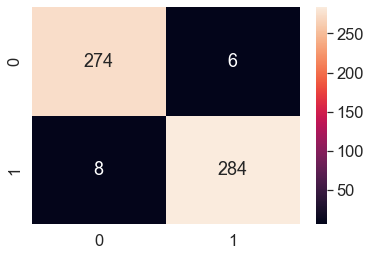

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train.squeeze())

print("Training set accuracy: {:.4f}".format(knn.score(X_train, y_train.squeeze())))
print("Test set accuracy: {:.4f}".format(knn.score(X_test, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, knn.predict(X_test)).ravel()
TPR_knn = TP / (TP + FN)
TNR_knn = TN / (TN + FP)
FPR_knn = FP / (FP + TN)
FNR_knn = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_knn))
print("True Negative Rate: {:.4f}".format(TNR_knn))
print("False Positive Rate: {:.4f}".format(FPR_knn))
print("False Negative Rate: {:.4f}".format(FNR_knn))

sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, fmt="d")

The K-Nearest Neighbors model has a high training set accuracy of $1.0000$ and a test set accuracy of $0.9755$. The true positive rate and the true negative rate are high, indicating that the model performs well at correctly identifying both male and female speakers. The false positive rate and the false negative rate are low, which suggests that there is a small risk of misclassifying a male or female speaker. Overall, the K-Nearest Neighbors model performs well on this classification task.

## Support Vector Machines

Support vector machines are a powerful and flexible class of supervised algorithms for both classification and regression. They are particularly well suited for classification of complex but small- or medium-sized datasets.

The main idea of SVM is to find a hyperplane that can separate the data. The hyperplane is the decision boundary that separates the data into different classes. The goal is to find the hyperplane that has the largest distance to the nearest data points of any class. This is called the maximum margin hyperplane.

Training set accuracy: 0.9904
Test set accuracy: 0.9790
True Positive Rate: 0.9863
True Negative Rate: 0.9714
False Positive Rate: 0.0286
False Negative Rate: 0.0137


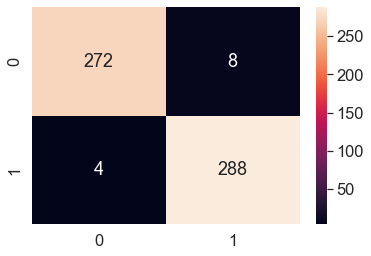

In [15]:
from sklearn.svm import SVC

svm = SVC(random_state=87).fit(X_train, y_train.squeeze())

print("Training set accuracy: {:.4f}".format(svm.score(X_train, y_train.squeeze())))
print("Test set accuracy: {:.4f}".format(svm.score(X_test, y_test.squeeze())))
sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)), annot=True, fmt="d")

TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test)).ravel()
TPR_svm = TP / (TP + FN)
TNR_svm = TN / (TN + FP)
FPR_svm = FP / (FP + TN)
FNR_svm = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_svm))
print("True Negative Rate: {:.4f}".format(TNR_svm))
print("False Positive Rate: {:.4f}".format(FPR_svm))
print("False Negative Rate: {:.4f}".format(FNR_svm))

### SVM with All Features

Now we will use all features to train the SVM model.

In [16]:
from sklearn.svm import SVC


def train_with_all_features(kernel):
    svm = SVC(random_state=87, kernel=kernel).fit(X_train, y_train.squeeze())

    train_accuracy = svm.score(X_train, y_train)
    test_accuracy = svm.score(X_test, y_test)

    print("Training set accuracy: {:.6f}".format(train_accuracy))
    print("Test set accuracy: {:.6f}".format(test_accuracy))
    sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)), annot=True, fmt="d")

    TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test)).ravel()
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)

    return train_accuracy, test_accuracy, TPR, TNR, FPR, FNR

#### Linear Kernel

Training set accuracy: 0.979878
Test set accuracy: 0.973776


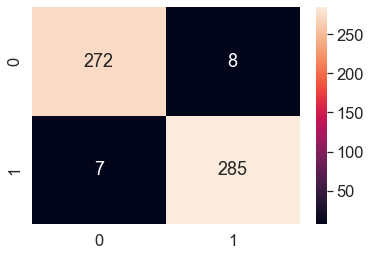

In [17]:
(
    train_accuracy_svm_all_linear,
    test_accuracy_svm_all_linear,
    TPR_svm_all_linear,
    TNR_svm_all_linear,
    FPR_svm_all_linear,
    FNR_svm_all_linear,
) = train_with_all_features("linear")

#### Polynomial Kernel

Training set accuracy: 0.984252
Test set accuracy: 0.972028


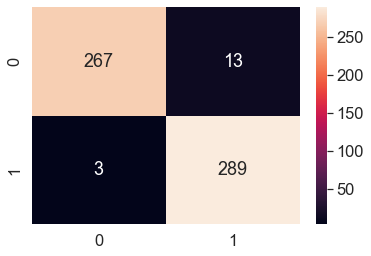

In [18]:
(
    train_accuracy_svm_all_poly,
    test_accuracy_svm_all_poly,
    TPR_svm_all_poly,
    TNR_svm_all_poly,
    FPR_svm_all_poly,
    FNR_svm_all_poly,
) = train_with_all_features("poly")

#### Gaussian Kernel

Training set accuracy: 0.990376
Test set accuracy: 0.979021


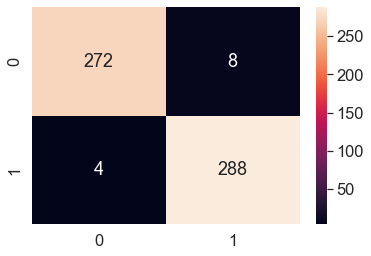

In [19]:
(
    train_accuracy_svm_all_gaussian,
    test_accuracy_svm_all_gaussian,
    TPR_svm_all_gaussian,
    TNR_svm_all_gaussian,
    FPR_svm_all_gaussian,
    FNR_svm_all_gaussian,
) = train_with_all_features("rbf")

#### Sigmoid Kernel

Training set accuracy: 0.843832
Test set accuracy: 0.837413


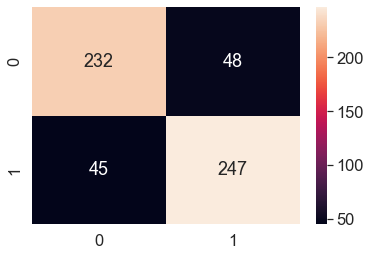

In [20]:
(
    train_accuracy_svm_all_sigmoid,
    test_accuracy_svm_all_sigmoid,
    TPR_svm_all_sigmoid,
    TNR_svm_all_sigmoid,
    FPR_svm_all_sigmoid,
    FNR_svm_all_sigmoid,
) = train_with_all_features("sigmoid")

#### Comparison among 4 SVM models

Here are the comparison of the results of the different kernels:

In [21]:
results = pd.DataFrame(
    {
        "Kernel": ["Linear", "Polynomial", "Gaussian", "Sigmoid"],
        "Training Accuracy": [
            train_accuracy_svm_all_linear,
            train_accuracy_svm_all_poly,
            train_accuracy_svm_all_gaussian,
            train_accuracy_svm_all_sigmoid,
        ],
        "Test Accuracy": [
            test_accuracy_svm_all_linear,
            test_accuracy_svm_all_poly,
            test_accuracy_svm_all_gaussian,
            test_accuracy_svm_all_sigmoid,
        ],
        "True Positive Rate": [
            TPR_svm_all_linear,
            TPR_svm_all_poly,
            TPR_svm_all_gaussian,
            TPR_svm_all_sigmoid,
        ],
        "True Negative Rate": [
            TNR_svm_all_linear,
            TNR_svm_all_poly,
            TNR_svm_all_gaussian,
            TNR_svm_all_sigmoid,
        ],
        "False Positive Rate": [
            FPR_svm_all_linear,
            FPR_svm_all_poly,
            FPR_svm_all_gaussian,
            FPR_svm_all_sigmoid,
        ],
        "False Negative Rate": [
            FNR_svm_all_linear,
            FNR_svm_all_poly,
            FNR_svm_all_gaussian,
            FNR_svm_all_sigmoid,
        ],
    }
)
results

,Kernel,Training Accuracy,Test Accuracy,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate
0,Linear,0.979878,0.973776,0.976027,0.971429,0.028571,0.023973
1,Polynomial,0.984252,0.972028,0.989726,0.953571,0.046429,0.010274
2,Gaussian,0.990376,0.979021,0.986301,0.971429,0.028571,0.013699
3,Sigmoid,0.843832,0.837413,0.845890,0.828571,0.171429,0.154110


We can see that Gaussian SVM performs best with a high accuracy and balanced true positive and true negative rates. It may be the best performing model among the four SVMs.

## Neural Network

We train a MLP neural network model with 2 hidden layers of 100 neurons each using the `MLPClassifier` class from scikit-learn. The model is trained on the training data (`X_train` and `y_train`) and its accuracy is evaluated on both the training and test sets. The training set accuracy and test set accuracy are printed to the console using the `score` method of the `MLPClassifier` object.

In [24]:
from sklearn.neural_network import MLPClassifier

mlp_2_layer = MLPClassifier(
    random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100)
).fit(X_train, y_train.squeeze())

print("Training set accuracy: {:.4f}".format(mlp_2_layer.score(X_train, y_train)))
print("Test set accuracy: {:.4f}".format(mlp_2_layer.score(X_test, y_test)))

Training set accuracy: 1.0000
Test set accuracy: 0.9755


We define a MLPClassifier model with 3 hidden layers of size 100 neurons

In [25]:
mlp_3_layer = MLPClassifier(
    random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100, 100)
).fit(X_train, y_train.squeeze())

print("Training set accuracy: {:.4f}".format(mlp_3_layer.score(X_train, y_train)))
print("Test set accuracy: {:.4f}".format(mlp_3_layer.score(X_test, y_test)))

Training set accuracy: 1.0000
Test set accuracy: 0.9755


We then create a 4-layer MLP classifier with 100 neurons in each hidden layer, fit it on the training data, and evaluate its accuracy on the training and test sets.
Print the training set accuracy and test set accuracy.

In [26]:
mlp_4_layer = MLPClassifier(
    random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100, 100, 100)
).fit(X_train, y_train.squeeze())

print("Training set accuracy: {:.4f}".format(mlp_4_layer.score(X_train, y_train)))
print("Test set accuracy: {:.4f}".format(mlp_4_layer.score(X_test, y_test)))

Training set accuracy: 1.0000
Test set accuracy: 0.9773


Now we create a MLP neural network classifier with 5 hidden layers, each having 100 neurons. It is trained using the training data (`X_train` and `y_train`), and its accuracy is evaluated on both the training and test sets using the `score` method. The training set accuracy and test set accuracy are then printed to the console.

In [27]:
mlp_5_layer = MLPClassifier(
    random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100, 100, 100, 100)
).fit(X_train, y_train.squeeze())

print("Training set accuracy: {:.4f}".format(mlp_5_layer.score(X_train, y_train)))
print("Test set accuracy: {:.4f}".format(mlp_5_layer.score(X_test, y_test)))

Training set accuracy: 1.0000
Test set accuracy: 0.9790


There is a gradual improvement in test set accuracy as the number of layers increases, with the 5-layer MLP achieving the highest accuracy of 0.9790. 